In [41]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize the StandardScaler
scaler = StandardScaler()

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaler.fit_transform(df_market_data), 
                         columns=df_market_data.columns, 
                         index=df_market_data.index)

# Display the first few rows of the scaled data
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [9]:
# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index

# Create a new DataFrame with scaled data
df_scaled = pd.DataFrame(scaler.fit_transform(df_market_data), 
                         columns=df_market_data.columns)

# Set the coin_id column as index
df_scaled.index = crypto_names

# Display the scaled DataFrame
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [10]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [ ]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_scaled)
    
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


In [12]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


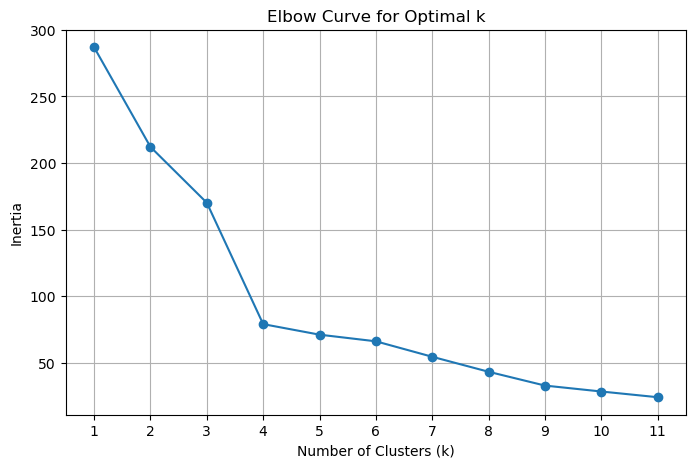

In [15]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Optimal k")
plt.xticks(k_values)
plt.grid()
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [16]:
# Initialize the K-Means model using the best value for k
optimal_k = 4  # Change this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)


In [ ]:
# Fit the K-Means model using the scaled DataFrame
cluster_labels = kmeans.fit_predict(df_scaled)
print(cluster_labels)

In [18]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
optimal_k = 4  # Change this if needed based on the elbow plot

# Initialize the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model and predict the clusters
cluster_labels = kmeans.fit_predict(df_scaled)

# Print the resulting array of cluster values
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


c:\Users\habdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
# Create a copy of the scaled DataFrame
df_clustered = df_scaled.copy()

# Add a new column with the predicted clusters
df_clustered["Cluster"] = cluster_labels

# Display the updated DataFrame
df_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [21]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["Cluster"],
    width=800,
    height=500,
    title="Cryptocurrency Clustering based on Price Changes"
)

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [22]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

# Fit and transform the scaled data
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), 
                      columns=["PC1", "PC2", "PC3"], 
                      index=df_scaled.index)

In [ ]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca = PCA(n_components=3)

df_pca = pd.DataFrame(pca.fit_transform(df_scaled), 
                      columns=["PC1", "PC2", "PC3"], 
                      index=df_scaled.index)

# View the scaled PCA data
print(df_pca.head())


In [25]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
# Create a PCA model instance with 3 components
pca = PCA(n_components=3)

# Fit and transform the scaled data
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), 
                      columns=["PC1", "PC2", "PC3"], 
                      index=df_scaled.index)

# Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display explained variance
df_explained_variance = pd.DataFrame(
    explained_variance, 
    index=["PC1", "PC2", "PC3"], 
    columns=["Explained Variance"]
)

# Print the explained variance values
print(df_explained_variance)

     Explained Variance
PC1            0.371986
PC2            0.347008
PC3            0.176038


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [ ]:
# Create a new DataFrame with the PCA data.
pca = PCA(n_components=3)

# Fit and transform the scaled data
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), 
                      columns=["PC1", "PC2", "PC3"], 
                      index=df_scaled.index)

# Copy the crypto names from the original scaled DataFrame
df_pca_final = df_pca.copy()

# Set the coin_id column as index
df_pca_final.index = df_scaled.index

# Display the scaled PCA DataFrame
print(df_pca_final.head())


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [ ]:
# Create a list with the number of k-values from 1 to 11


In [29]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
# Create an empty list to store the inertia values
# Create an empty list to store the inertia values
inertia_values = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_pca_final)
    
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a DataFrame to store inertia values
df_inertia = pd.DataFrame({"k": k_values, "inertia": inertia_values})


c:\Users\habdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\habdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\habdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\habdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [27]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

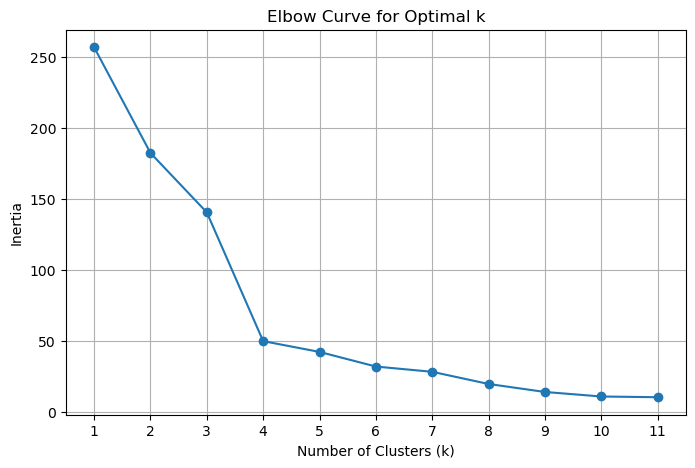

In [30]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(df_inertia["k"], df_inertia["inertia"], marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Optimal k")
plt.xticks(k_values)
plt.grid()
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [31]:
# Initialize the K-Means model using the best value for k
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)


In [ ]:
# Fit the K-Means model using the PCA data
cluster_labels = kmeans.fit_predict(df_pca_final)
# Print the resulting cluster labels
print("Cluster Labels:\n", cluster_labels)

In [ ]:
# Create a copy of the scaled PCA DataFrame
df_pca_clustered = df_pca_final.copy()
# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_clustered["Cluster"] = cluster_labels

# Display the copy of the scaled PCA DataFrame
df_pca_clustered.head()

In [36]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_clustered.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",  # Color by cluster
    hover_cols=["Cluster"],  # Add cluster information on hover
    width=800,
    height=500,
    title="Cryptocurrency Clustering based on PCA"
)

# Display the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

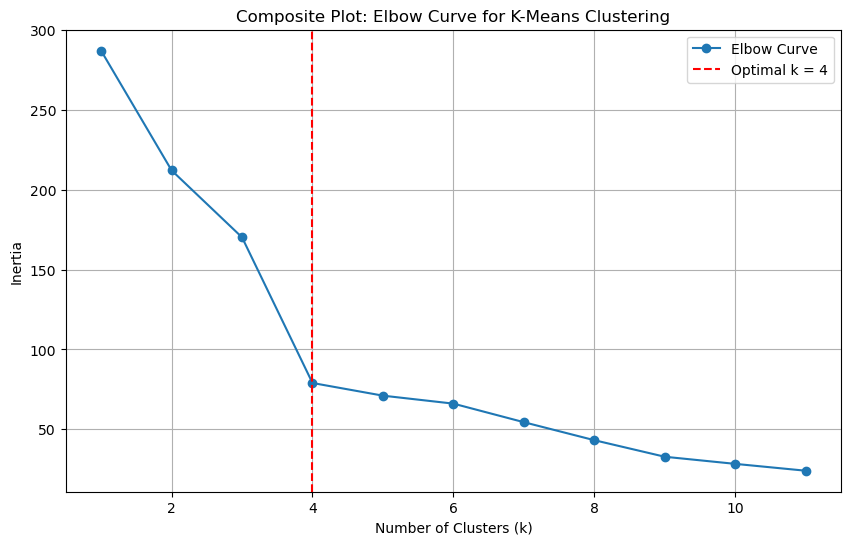

In [38]:
# Composite plot to contrast the Elbow curves
# Create the composite plot
plt.figure(figsize=(10, 6))

# Plot the Elbow curve
plt.plot(df_elbow["k"], df_elbow["inertia"], marker="o", linestyle="-", label="Elbow Curve")

# Annotate the optimal k value (adjust based on previous analysis)
optimal_k = 4  # Change this value if needed
plt.axvline(x=optimal_k, color='r', linestyle="--", label=f"Optimal k = {optimal_k}")

# Labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Composite Plot: Elbow Curve for K-Means Clustering")
plt.legend()
plt.grid()

# Show the plot
plt.show()

c:\Users\habdo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


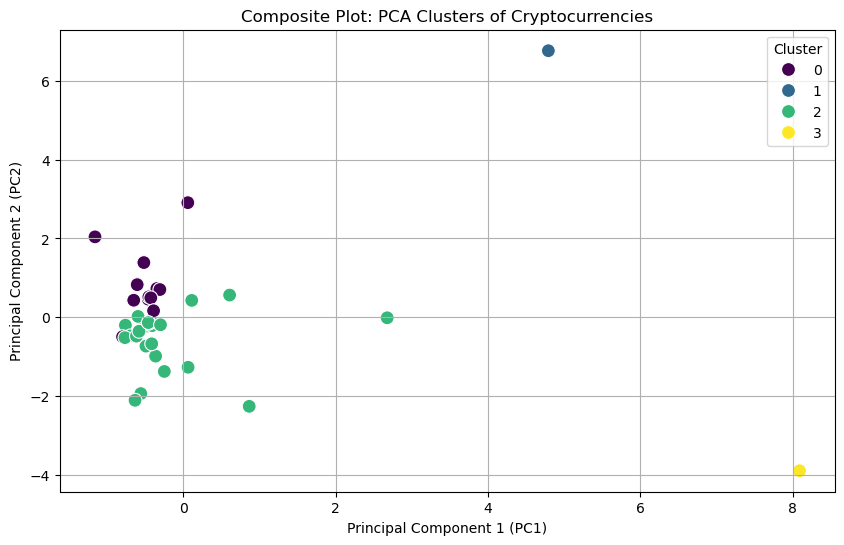

In [42]:
# Composite plot to contrast the clusters
# Perform PCA with 3 components
pca = PCA(n_components=3)
df_pca_final = pd.DataFrame(pca.fit_transform(df_scaled), 
                            columns=["PC1", "PC2", "PC3"], 
                            index=df_scaled.index)

# Determine the best k (adjust if needed)
optimal_k = 4  

# Initialize and fit K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca_final)

# Add the cluster labels to the PCA DataFrame
df_pca_clustered = df_pca_final.copy()
df_pca_clustered["Cluster"] = cluster_labels

# Create a composite plot to contrast the clusters
plt.figure(figsize=(10, 6))

# Scatter plot of PCA components with clusters
sns.scatterplot(
    x=df_pca_clustered["PC1"], 
    y=df_pca_clustered["PC2"], 
    hue=df_pca_clustered["Cluster"], 
    palette="viridis",
    s=100
)

# Labels and title
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("Composite Plot: PCA Clusters of Cryptocurrencies")
plt.legend(title="Cluster")
plt.grid()

# Show the plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 